In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from IPython import display
import random
import time
# import timeit
# import gym
# from collections import deque
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam

from CrimeWorld import CrimeWorld

In [3]:
# reset everything
np.random.seed(0)
start = time.time()

T=730 
it=100*730 
cw = CrimeWorld()

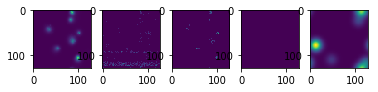

2.203880548477173
k=3900, n=1528.0, crimes=337.0


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

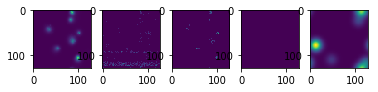

In [13]:
totalC = np.zeros(1)
for k in range(it):
    C,B,n,P = cw.update()
    if totalC.sum() == 0:
        totalC = C
    else:
        totalC += C
        
    if k % 100 == 0:
        end = time.time()
        plt.clf()
        fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(figsize=(10, 20),nrows=5,ncols=1)
        ax1.imshow(B)       # dynamic attractiveness
        ax2.imshow(n)       # burglar count
        ax3.imshow(totalC)  # crimes since last update
        ax4.imshow(P)       # police count
        ax5.imshow(cw.D)    # police deterrence
        display.clear_output(wait=True)
        display.display(plt.gcf())
        print(end-start)
        print("k={}, n={}, crimes={}".format(k,n.sum(),totalC.sum()))
        start = time.time()
        
        totalC = np.zeros(1)

In [ ]:
np.savez("data_file.npz", C=C, B=B, n=n, P=P)

In [10]:
# add agents on top K hotspots
K = 50
Br = B.ravel()
ind = np.argpartition(Br,-K)[-K:]       # 1D index of top K elements
y,x = np.unravel_index(ind,B.shape)     # 2D index

for i in range(K):
    cw.add_agent(x,y)

In [12]:
# clear
cw.remove_agents()